In [1]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import argparse
import matplotlib.colors as mcolors
import warnings
import cartopy.feature as cfeature

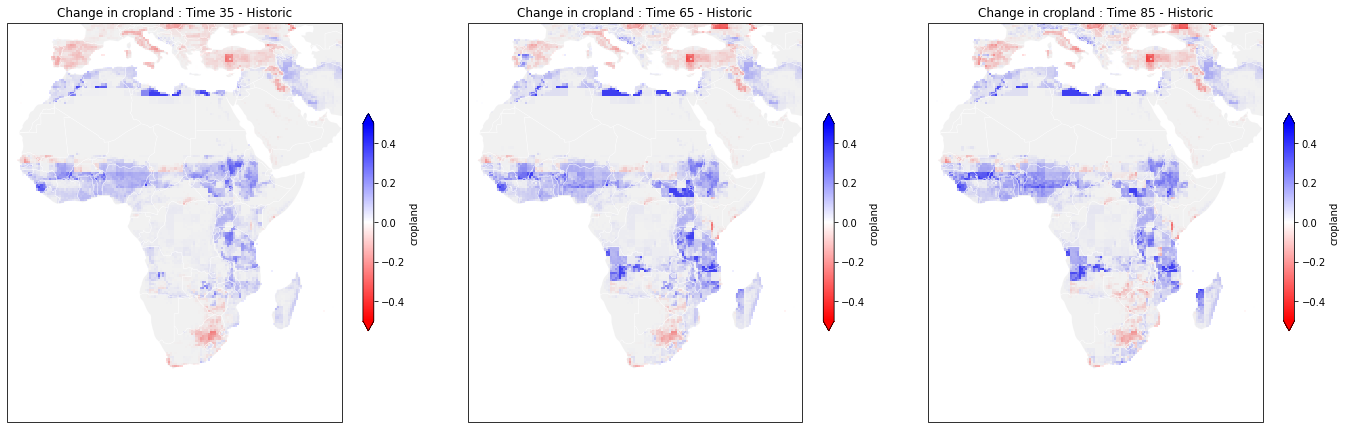

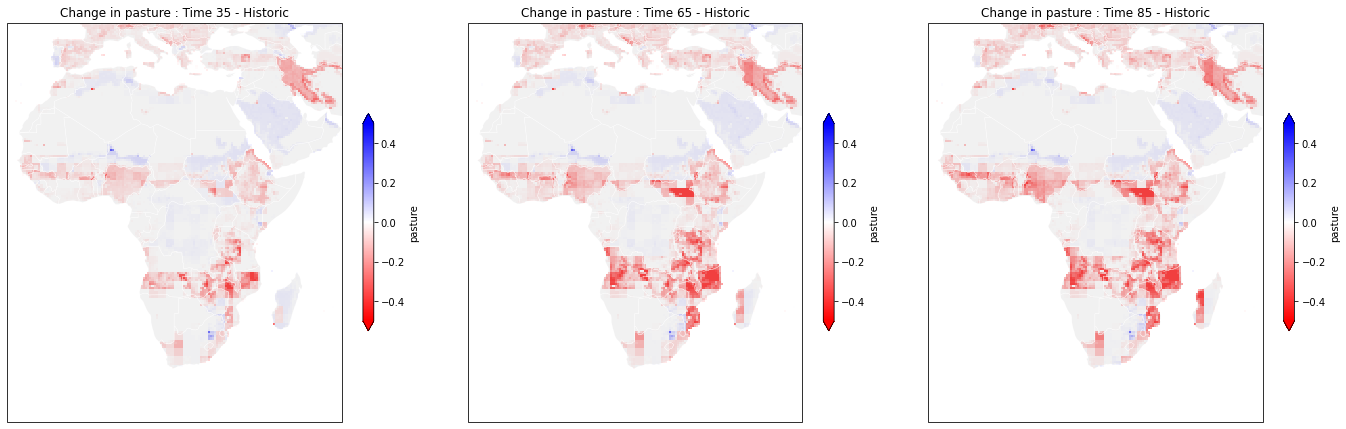

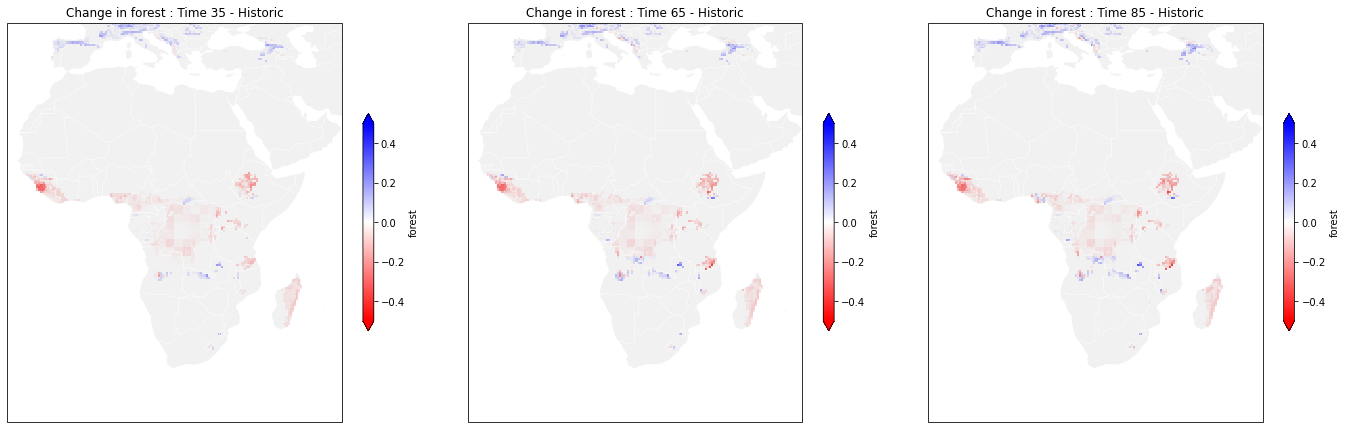

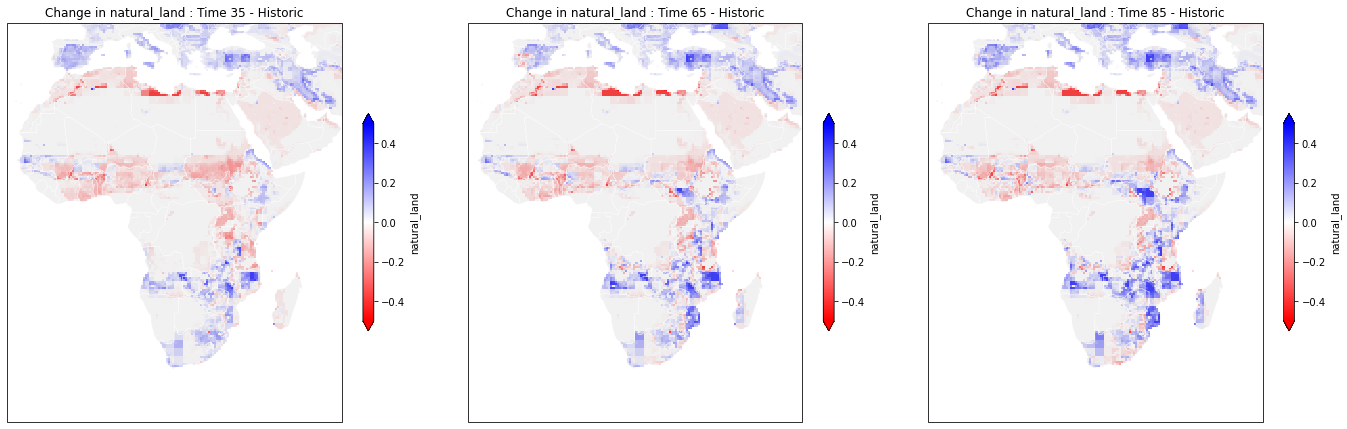

In [7]:

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[35, 65, 85])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [35, 65, 85]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes[i]
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
        im = difference.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='bwr_r', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.5})
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"Change in {category} : Time {time} - Historic")
        ax.set_extent((-20, 60, -40, 40))
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
    plt.show()


In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import warnings

In [2]:
import matplotlib as mpl
def set_plot_param():

    """Set my own customized plotting parameters"""

    import matplotlib as mpl

    mpl.rc('axes',edgecolor='grey')

    mpl.rc('axes',labelcolor='black')

    mpl.rc('xtick',color='black')

    mpl.rc('xtick',labelsize=12)

    mpl.rc('ytick',color='black')

    mpl.rc('ytick',labelsize=12)

    mpl.rc('axes',titlesize=18)

    mpl.rc('axes',labelsize=12)

    mpl.rc('legend',fontsize='large')

    mpl.rc('text',color='black')
    

    

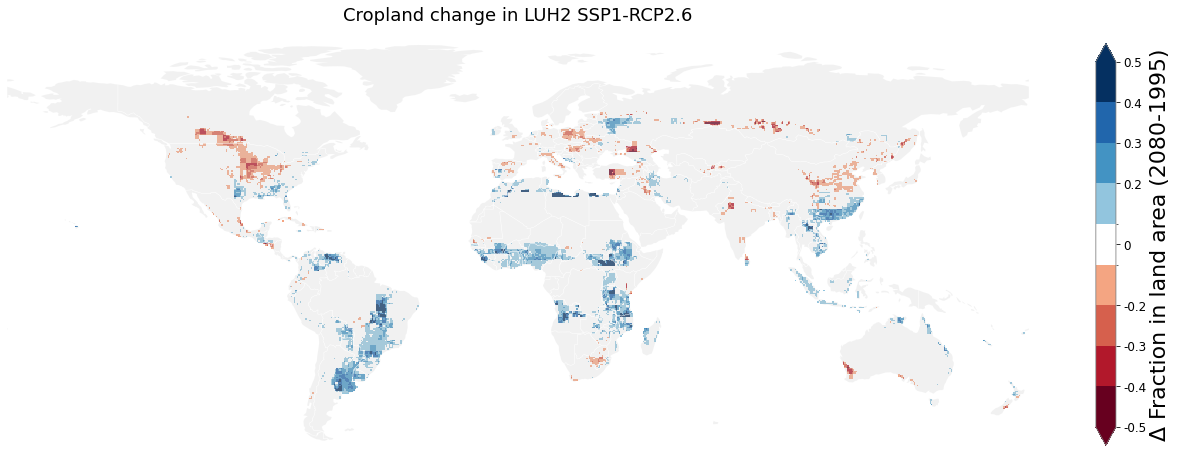

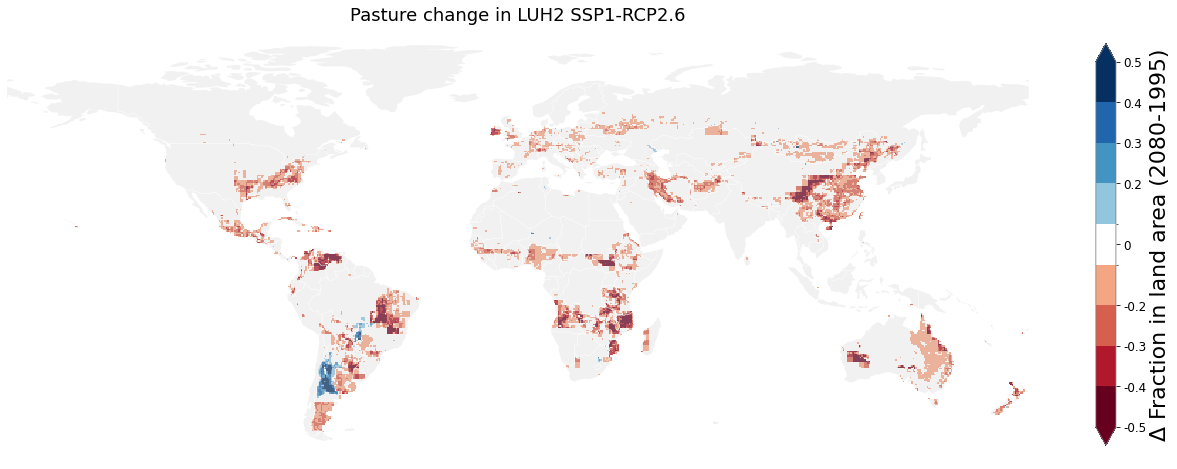

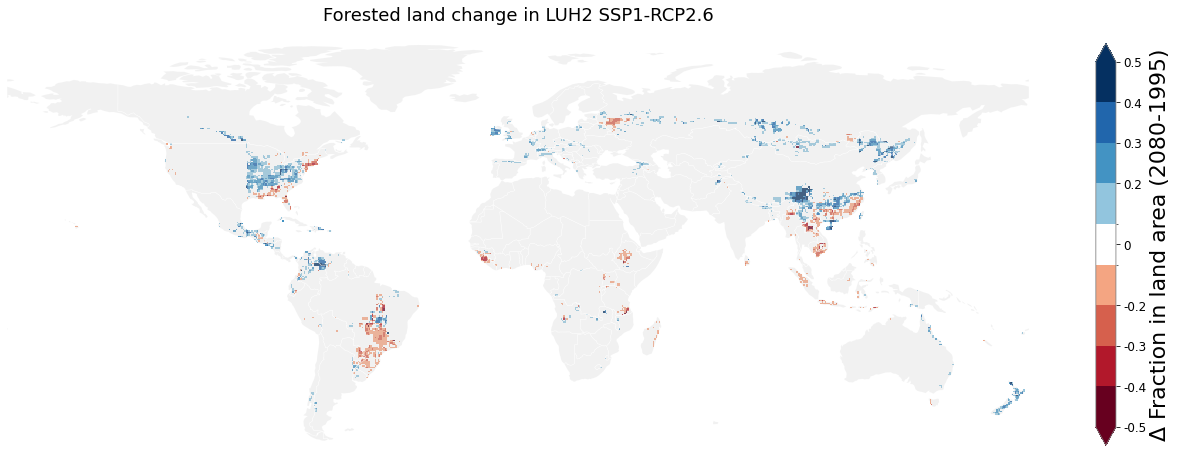

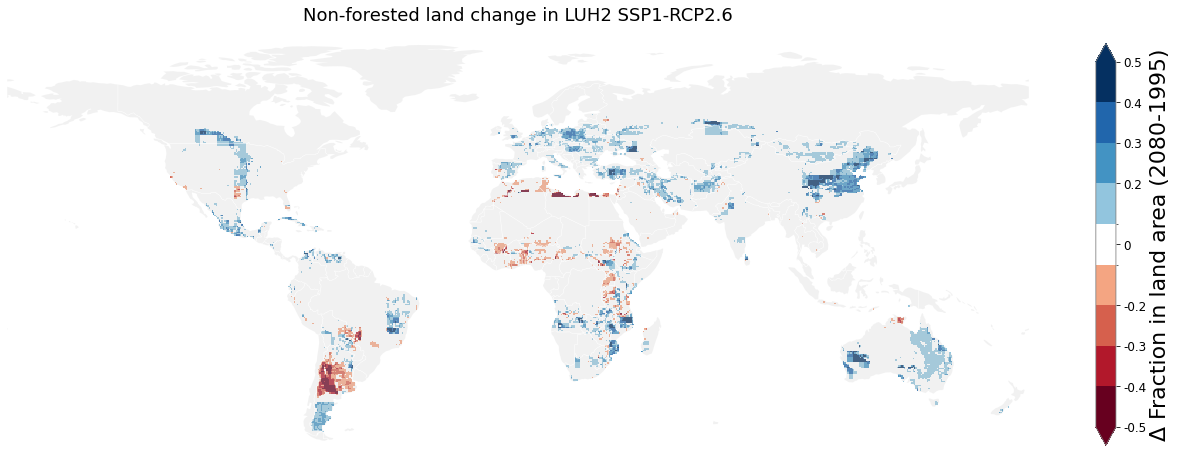

In [49]:

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

set_plot_param()
# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[65])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

# Category mapping
category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [65]

custom_colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#ffffff', '#92c5de', '#4393c3', '#2166ac', '#053061' ]
#custom_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#ffffff', '#c7eae5', '#80cdc1', '#35978f', '#01665e'] # brown to turqois
cmap = ListedColormap(custom_colors)

boundaries = [-0.5, -0.4, -0.3, -0.2,-0.1,0.1,0.2, 0.3, 0.4, 0.5] # Adjust these values according to your data
norm = BoundaryNorm(boundaries, cmap.N)


    
# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
       # im = difference.pcolormesh(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='RdBu', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.8})
        
        im = axes.pcolormesh(difference['lon'].values, difference['lat'].values, difference.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)

        ax.set_title(f"{category} change in LUH2 SSP1-RCP2.6")

        ax.axis('off')
        ax.set_extent((-180,180,-63,90))
        ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
      #  ax.set_title(labels[0],loc='left',weight='bold', fontsize=22)

    cbar = fig.colorbar(im,orientation='vertical', fraction=0.015, pad=0.05,extend='both')
    cbar.set_label('Δ Fraction in land area (2080-1995)', fontsize=22)
    ticks = np.array([-0.5, -0.4, -0.3, -0.2,-0,0.2, 0.3, 0.4, 0.5])
    tick_labels = ['-0.5', '-0.4', '-0.3', '-0.2', '0', '0.2', '0.3', '0.4', '0.5']

    # Setzen Sie die Ticks und Tick-Labels für die Farbleiste
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(tick_labels)

    # Show the plot

#plt.savefig("/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/annex")



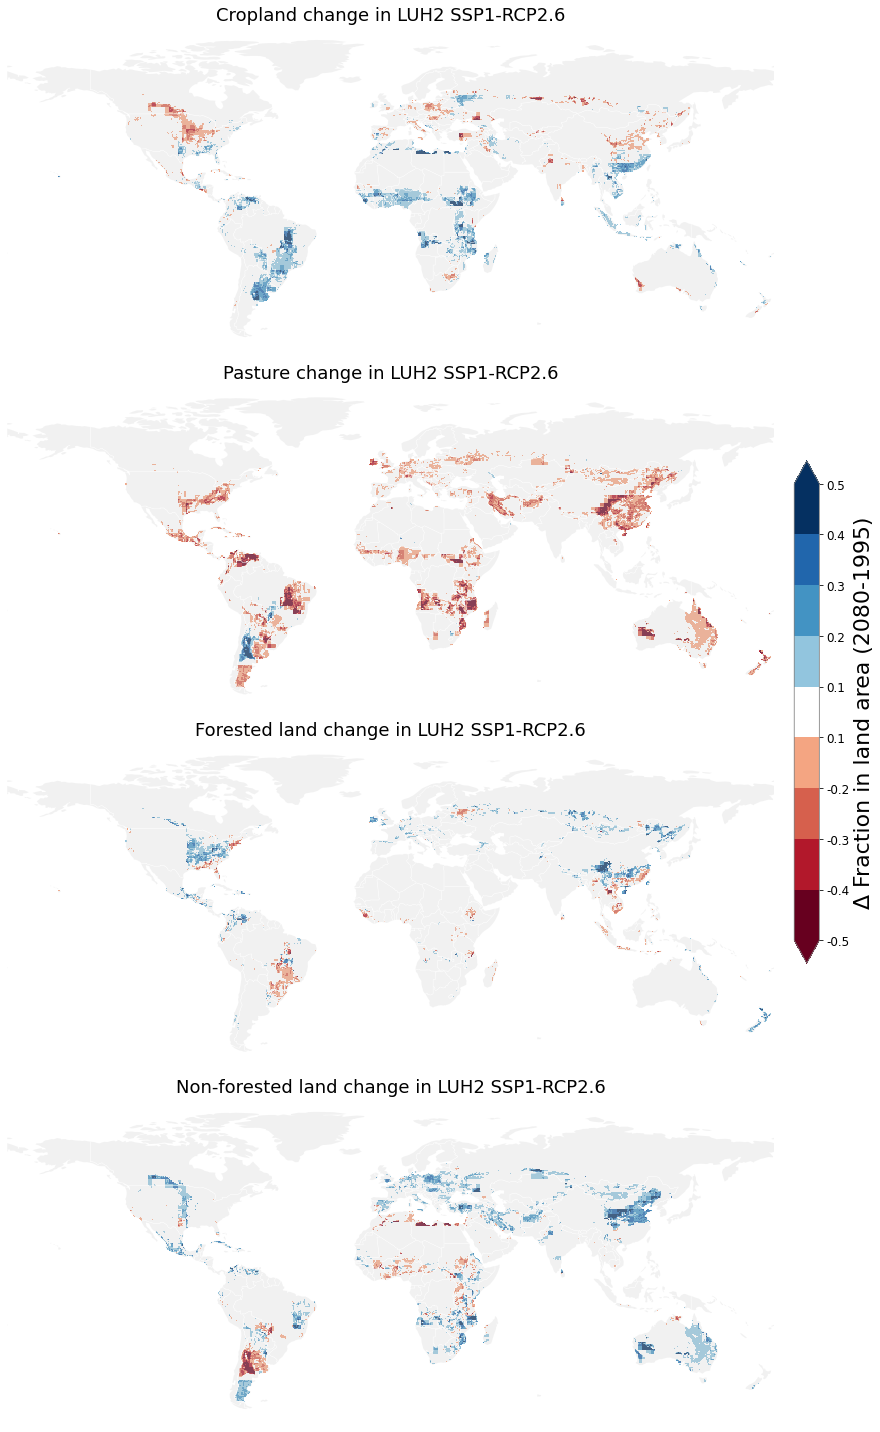

In [90]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

# Set plot parameters
set_plot_param() 
# Load country shapes for plotting
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Land use data paths and loading
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_landuse = xr.open_dataset(LandUseList, decode_times=False).isel(time=[65])
da_historic = xr.open_dataset(LUH_historic, decode_times=False).isel(time=1146)

# Define category mappings and custom colors
# Category mapping
category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}

custom_colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#ffffff', '#92c5de', '#4393c3', '#2166ac', '#053061']
cmap = ListedColormap(custom_colors)
boundaries = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, cmap.N)

# Prepare the dataset by summing categories
sum_over_categories = xr.Dataset()
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Create a 1x4 subplot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten in case of a single row to ease indexing

# Plot each category on its respective subplot
for i, (category, ax) in enumerate(zip(sum_over_categories.data_vars, axes)):
    difference = sum_over_categories[category].isel(time=0) - da_historic[category]
    im = ax.pcolormesh(difference['lon'].values, difference['lat'].values, difference.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
    ax.set_title(f"{category} change in LUH2 SSP1-RCP2.6")
    ax.axis('off')
    ax.set_extent((-180, 180, -63, 90))
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)

# Adjust colorbar for the entire figure
cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.03, pad=-0.2, extend='both')
cbar.set_label('Δ Fraction in land area (2080-1995)', fontsize=22)
cbar.set_ticks(boundaries)


cbar.set_ticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '0.1','0.1', '0.2', '0.3', '0.4', '0.5'])

plt.tight_layout()  # Adjust layout to not overlap subplots
#plt.savefig("/path/to/your/figure.png")  # Save the figure
plt.show()  # Show the plot


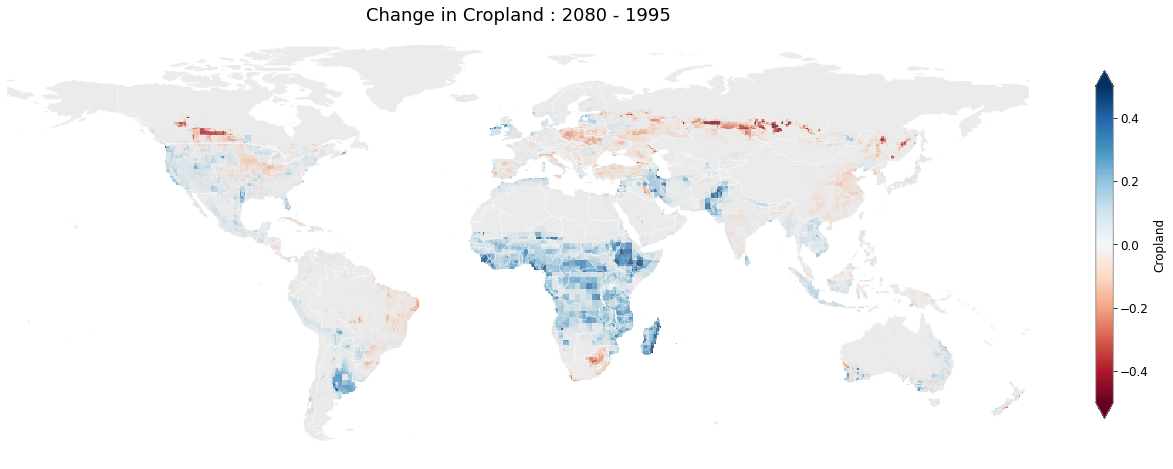

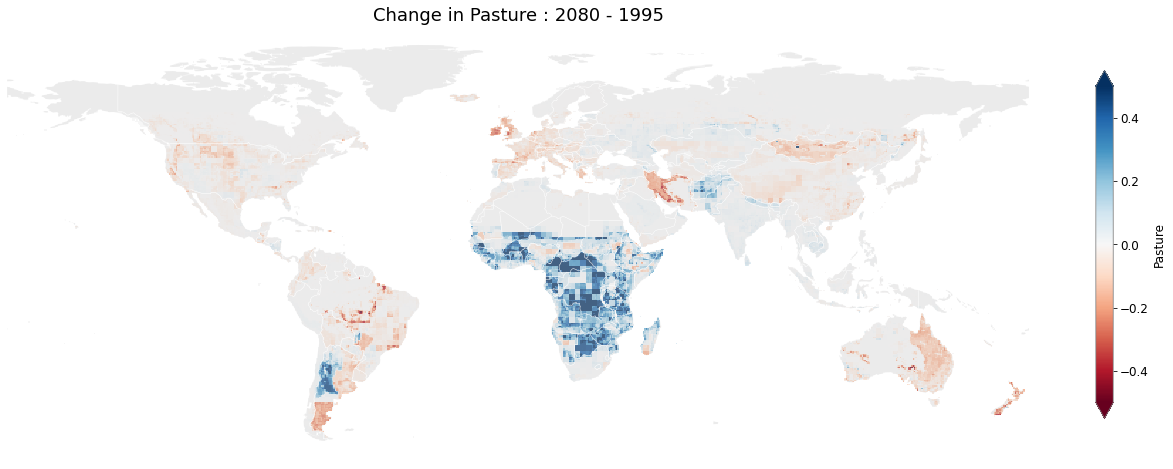

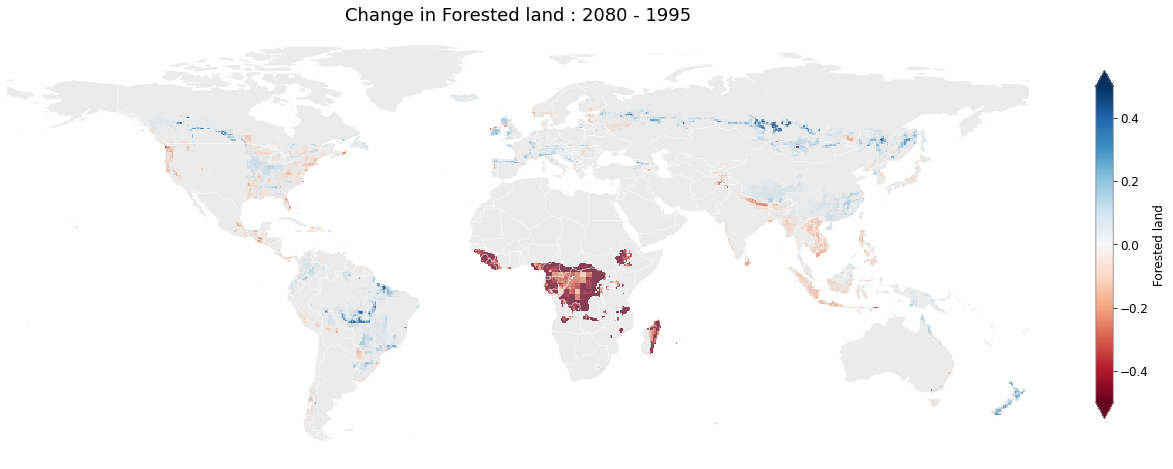

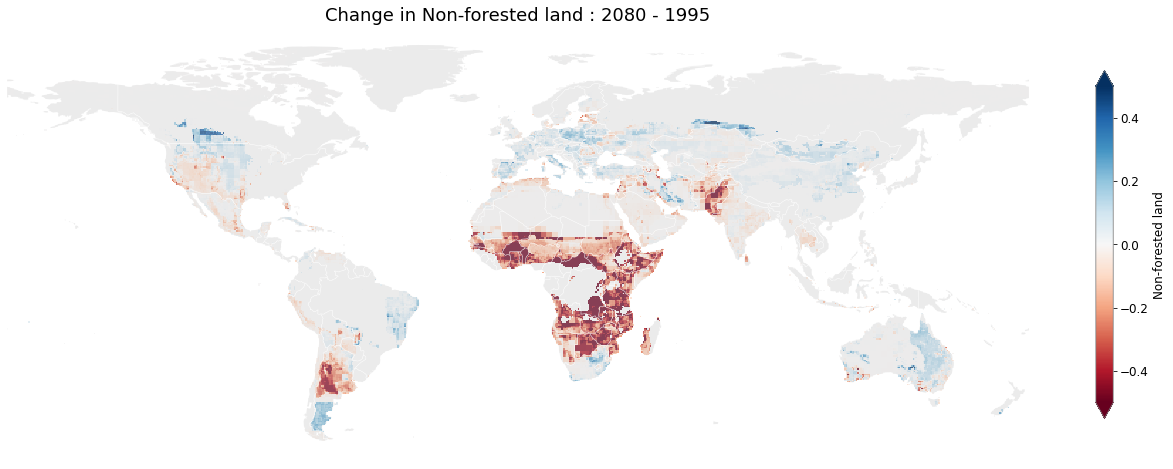

In [119]:

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Future LUH2
LandUseList = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc"
ncfname = LandUseList
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_landuse = da_landuse.isel(time=[65])

LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}
# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [65]

# Plot each category on a lon-lat map
for category in sum_over_categories.data_vars:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot future data for each selected time point in the remaining columns
    for i, time in enumerate(time_points):
        ax = axes
        # Compute the difference between the future and the historical data
        difference = sum_over_categories[category].isel(time=i) - da_historic[category]
        im = difference.plot.imshow(x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='RdBu', ax=ax, vmin=-0.5, vmax=0.5, cbar_kwargs={'shrink': 0.8})
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
        ax.axis('off')
        ax.set_extent((-180,180,-63,90))
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.set_title(f"Change in {category} : 2080 - 1995")
        #ax.set_extent((-20, 60, -40, 40))
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    
    # Show the plot
plt.show()
#plt.savefig("/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/annex")

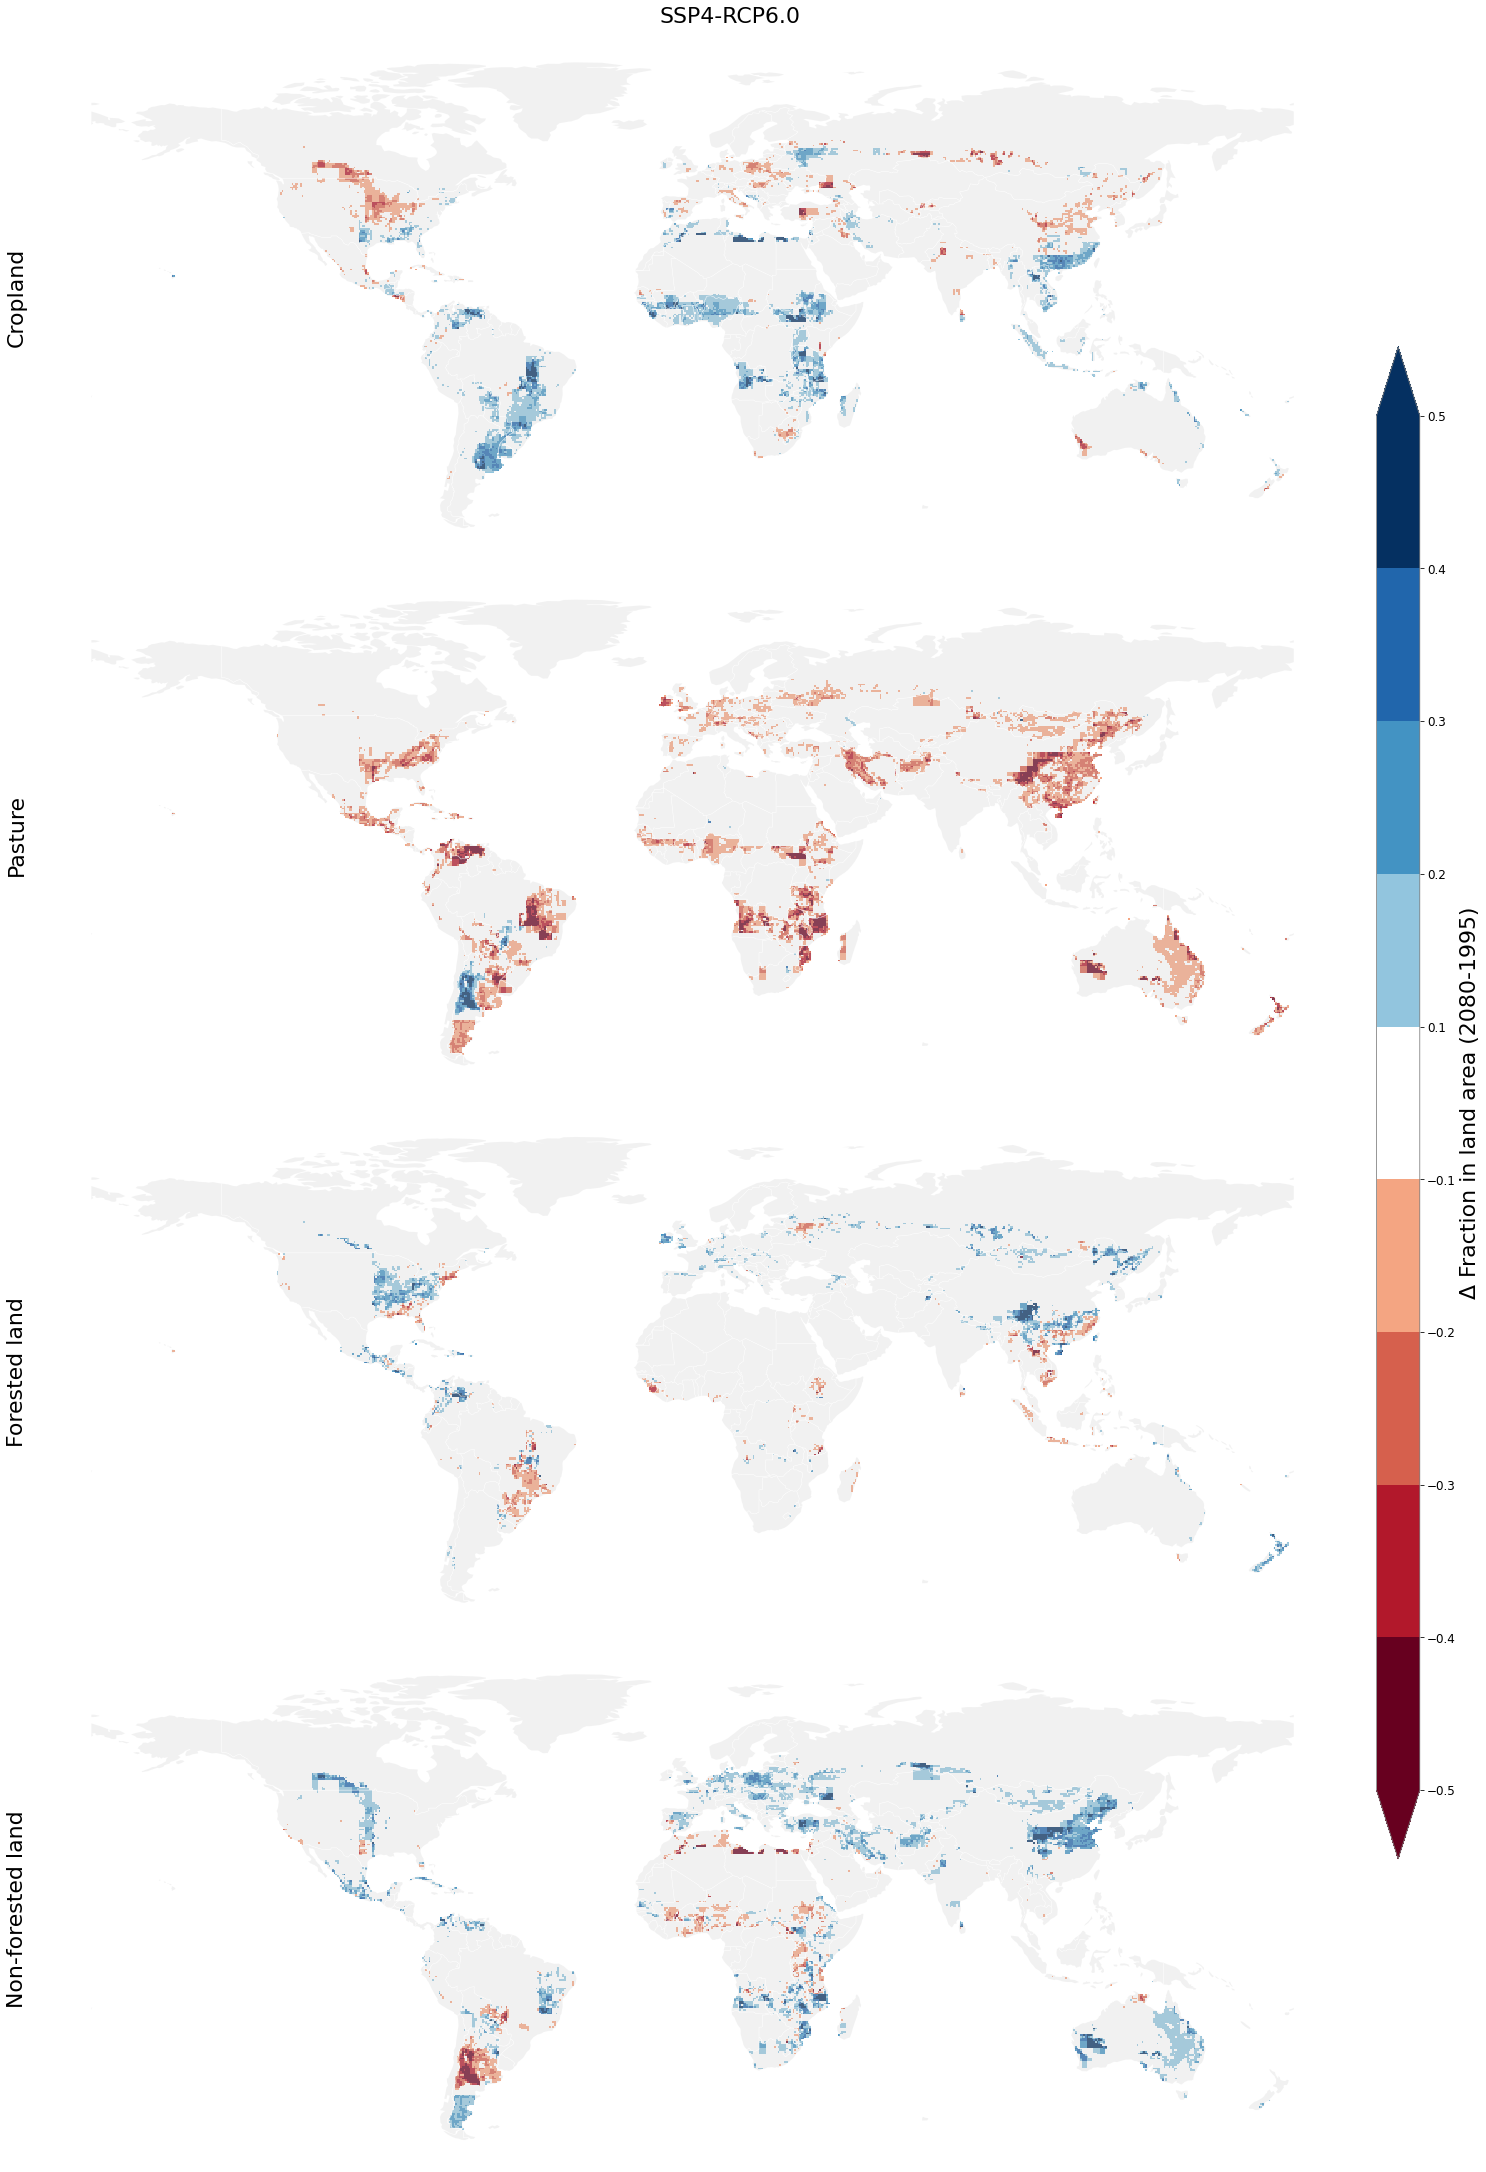

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# I assume set_plot_param() sets up your matplotlib styles
set_plot_param() 

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Future LUH2
ssp460 = xr.open_dataset("/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc", decode_times=False)
da_landuse = ssp460.isel(time=[65])

ssp126 = xr.open_dataset("/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc", decode_times=False)
da_landuse = ssp126.isel(time=[65])


LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False)
da_historic = da_historic.isel(time=1146)

category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}

sum_over_categories = xr.Dataset()

# Sum the categories for both datasets
for category, vars_in_category in category_mapping.items():
    sum_over_categories[category] = sum(da_landuse[var] for var in vars_in_category)
    da_historic[category] = sum(da_historic[var] for var in vars_in_category)

# Time points for future dataset
time_points = [65]

num_categories = len(sum_over_categories.data_vars)

fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(20, 30), subplot_kw={'projection': ccrs.PlateCarree()})

# If there's only one category, wrap axes in a list
if num_categories == 1:
    axes = [axes]

custom_colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#ffffff', '#92c5de', '#4393c3', '#2166ac', '#053061']
cmap = ListedColormap(custom_colors)
boundaries = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, cmap.N)

for ax, (category, data_array) in zip(axes, sum_over_categories.data_vars.items()):
    difference = sum_over_categories[category].isel(time=0) - da_historic[category]
    im = ax.pcolormesh(difference['lon'].values, difference['lat'].values, difference.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
    ax.set_extent((-180, 180, -63, 90))
    ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
    ax.axis('off')
    # Instead of using ax.set_ylabel(), use ax.text() for precise positioning
    ax.text(-0.07, 0.5, category, va='center', ha='left', rotation='vertical', transform=ax.transAxes, fontsize=22)

# Adjust layout and add colorbar
fig.text(0.5,1, 'SSP4-RCP6.0', ha='right', fontsize=22)
fig.tight_layout(rect=[0, 0, 0.85, 1])
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # Adjust colorbar position
fig.colorbar(im, cax=cbar_ax, orientation='vertical', extend='both').set_label(label='Δ Fraction in land area (2080-1995)', fontsize=22)

plt.show()


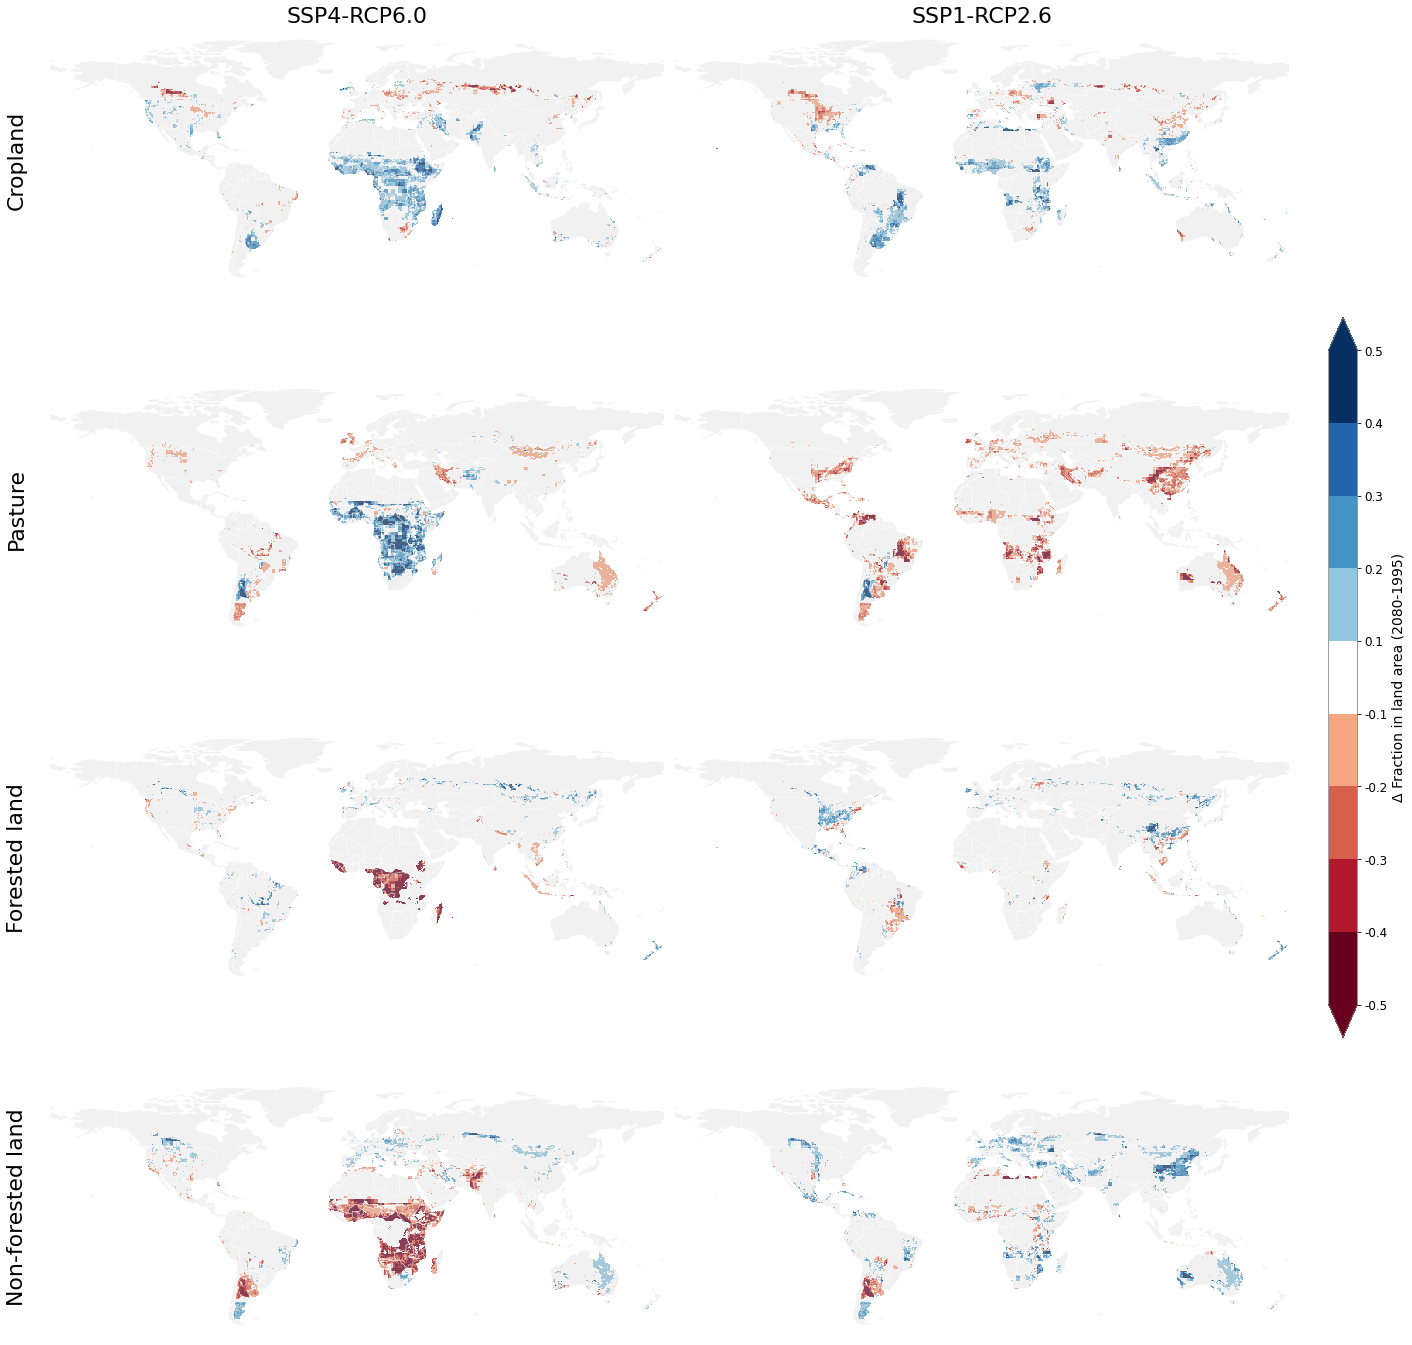

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Assuming set_plot_param() is defined elsewhere
# set_plot_param() 

warnings.filterwarnings('ignore', category=UserWarning)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Load SSP460 data
ssp460_ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc"
da_landuse_ssp460 = xr.open_dataset(ssp460_ncfname, decode_times=False).isel(time=[65])

# Load SSP126 data
ssp126_ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
da_landuse_ssp126 = xr.open_dataset(ssp126_ncfname, decode_times=False).isel(time=[65])

# Historical data remains the same
LUH_historic = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc"
da_historic = xr.open_dataset(LUH_historic, decode_times=False).isel(time=1146)

# Define category mappings and custom colors
category_mapping = {
    'Cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'Pasture': ['pastr', 'range'],
    'Forested land': ['primf', 'secdf'],
    'Non-forested land': ['primn', 'secdn']
}
scenario_indices={"SSP126": 'SSP1-RCP2.6', "SSP460": 'SSP4-RCP6.0'}
custom_colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#ffffff', '#92c5de', '#4393c3', '#2166ac', '#053061']
cmap = ListedColormap(custom_colors)
boundaries = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5]
norm = BoundaryNorm(boundaries, cmap.N)

num_categories = len(category_mapping)

# Create a subplot grid with rows for each category and 2 columns for SSP460 and SSP126
fig, axes = plt.subplots(nrows=num_categories, ncols=2, figsize=(20, 5 * num_categories), subplot_kw={'projection': ccrs.PlateCarree()})

for i, (category, vars_in_category) in enumerate(category_mapping.items()):
    for j, scenario in enumerate(['SSP460', 'SSP126']):
        ax = axes[i, j]
        da_landuse = da_landuse_ssp460 if scenario == 'SSP460' else da_landuse_ssp126
        difference = sum(da_landuse[var].isel(time=0) for var in vars_in_category) - sum(da_historic[var] for var in vars_in_category)
        im = ax.pcolormesh(difference['lon'].values, difference['lat'].values, difference.values, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
        countries.plot(ax=ax, color="lightgray", zorder=1, alpha=0.3)
        ax.set_extent((-180, 180, -63, 90))
        ax.add_feature(cfeature.BORDERS, color='white', linewidth=0.5)
        ax.axis('off')
        # Set scenario titles for the top row
        if i == 0:
            ax.set_title(f"{scenario_indices[scenario]}", fontsize=22)
        # Set category labels for the first column
        if j == 0:
            ax.text(-0.07, 0.5, category, va='center', ha='left', rotation='vertical', transform=ax.transAxes, fontsize=22)

# Adjust layout
fig.tight_layout(rect=[0, 0, 0.9, 1])

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Adjust colorbar position cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical', extend='both')
cbar.set_label('Δ Fraction in land area (2080-1995)', fontsize=14)
cbar.set_ticks(boundaries)
cbar.set_ticklabels(['-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0.1', '0.2', '0.3', '0.4', '0.5'])

plt.show()
